## Imports

In [10]:
import numpy as np
from matplotlib import pyplot, cm
from mpl_toolkits.mplot3d import Axes3D

import time

from numba import njit
from pyccel.epyccel import epyccel
from pyccel.decorators import types

## Pure python function

In [11]:
def solve_2d_diff_pure(u, un, nt, dt, dx, dy, nu):
    row, col = u.shape
    
    ###Assign initial conditions
    # set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
    u[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2
    for it in range(nt):
        for i in range(row): un[i] = u[i] 
        for j in range(2, col):
            for i in range(2, row-1):
                u[j-1, i-1] = un[j-1, i-1]+nu*(dt/dx**2)*(un[j-1, i]-2*un[j-1, i-1]+un[j-1, i-2])+nu*(dt/dy**2)*(un[j, i-1]-2*un[j-1, i-1]+un[j-2, i-1])
        
    
    
    #fill the update of u
        
    return 0

## Numba accelerator

In [12]:
@njit(fastmath=True)
def solve_2d_diff_numba(u, un, nt, dt, dx, dy, nu):
    row, col = u.shape
    
    ###Assign initial conditions
    # set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
    u[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2
    for it in range(nt):
        for i in range(row): un[i] = u[i] 
        for j in range(2, col):
            for i in range(2, row-1):
                u[j-1, i-1] = un[j-1, i-1]+nu*(dt/dx**2)*(un[j-1, i]-2*un[j-1, i-1]+un[j-1, i-2])+nu*(dt/dy**2)*(un[j, i-1]-2*un[j-1, i-1]+un[j-2, i-1])
        
    
    
    #fill the update of u
        
    return 0

## Pyccel accelerator

In [18]:
@types('float[:,:]', 'float[:,:]','int','float','float','float','float')
def solve_2d_diff_pyccel(u, un, nt, dt, dx, dy, nu):
    row, col = u.shape
    
    ##Assign initial conditions
    #set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
    u[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2
    for it in range(nt):
        for i in range(row): un[i] = u[i] 
        for j in range(2, col):
            for i in range(2, row-1):
                u[j-1, i-1] = un[j-1, i-1]+nu*(dt/dx**2)*(un[j-1, i]-2*un[j-1, i-1]+un[j-1, i-2])+nu*(dt/dy**2)*(un[j, i-1]-2*un[j-1, i-1]+un[j-2, i-1])
        
    
    
    #fill the update of u and v
        
    return 0

## Inputs

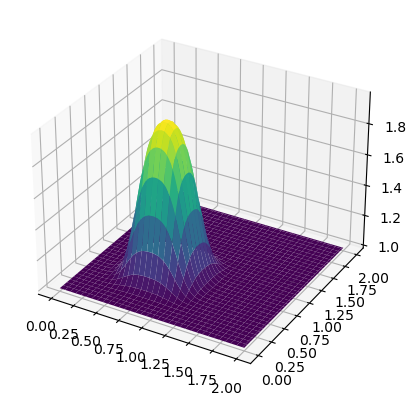

In [14]:
###variable declarations
nt = 51
nx = 101
ny = 101
nu = .05
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
sigma = .25
dt = sigma * dx * dy / nu

x = np.linspace(0, 2, nx)
y = np.linspace(0, 2, ny)

u = np.ones((ny, nx))  # create a 1xn vector of 1's
un = np.ones((ny, nx))
    

solve_2d_diff_pure(u, un, nt, dt, dx, dy, nu)

fig = pyplot.figure(figsize=(7, 5), dpi=100)
ax = fig.gca(projection='3d')                      
X, Y = np.meshgrid(x, y)                            
surf = ax.plot_surface(X, Y, u, cmap=cm.viridis)

## Call Funtions

### Pure function

In [15]:
%timeit solve_2d_diff_pure(u, un, nt, dt, dx, dy, nu)

3.64 s ± 116 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Function with numba accelerator

In [16]:
%timeit solve_2d_diff_numba(u, un, nt, dt, dx, dy, nu)

5.27 ms ± 273 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Function with pyccel accelerator

In [19]:
solve_2d_diff_f90 = epyccel(solve_2d_diff_pyccel)

In [20]:
%timeit solve_2d_diff_f90(u, un, nt, dt, dx, dy, nu)

1.21 ms ± 614 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)
